# Logistic Regression in Python
### Dataset: titanic


In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
#import the csv file to a dataset
df_titanic = pd.read_csv("titanic.csv")

In [92]:
#save the imported dataframe
df = pd.DataFrame(df_titanic)

In [93]:
#displays the head of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
#check variable types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [95]:
#check the number of missing values 
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
#get statistical information about variables
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visually examining some variables

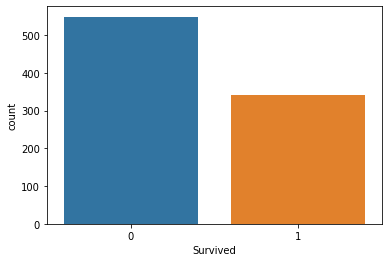

In [97]:
#checking the distribution of the target variable
sns.countplot(data=df, x='Survived')

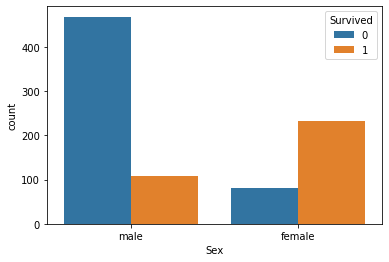

In [98]:
#Visualization of Survived target variable with respect to Gender
sns.countplot(df['Sex'], hue=df['Survived'])

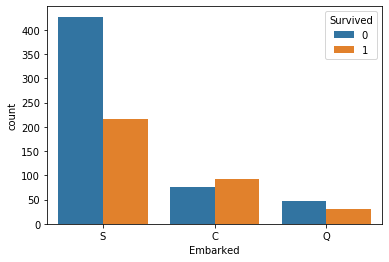

In [99]:
#Visualization of Survived target variable with variable Embarked
sns.countplot(data=df, x='Embarked' , hue='Survived')

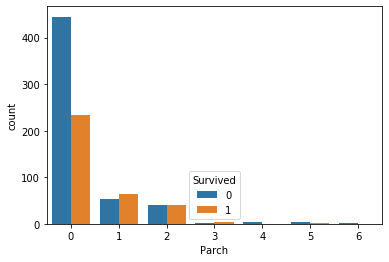

In [100]:
#Visualization of Survived target variable with variable Parch
sns.countplot(data=df, x = 'Parch', hue = 'Survived')

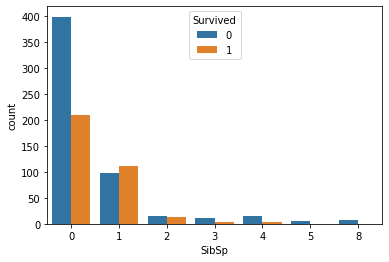

In [101]:
#Visualization of Survived target variable with variable SibSp
sns.countplot(data=df, x='SibSp', hue='Survived')

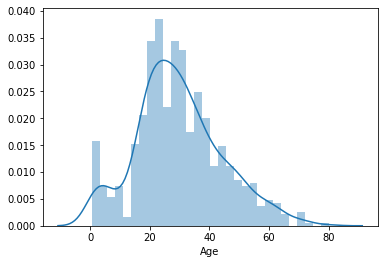

In [102]:
#Distribution of variable Age
sns.distplot(df['Age'], bins=30, kde=True)

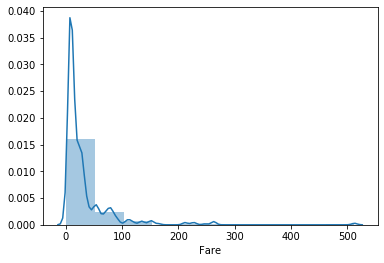

In [103]:
#Distribution of variable Fare
sns.distplot(df['Fare'], bins=10, kde=True)

In [104]:
#drops the columns where all records are missing
df = df.dropna(how='all', axis = 1)
print(df.shape)

(891, 12)


In [105]:
#dropping variable Cabin, since most of the values are missing
df.drop(['Cabin'], inplace=True, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [106]:
#After removing variable cabin, Age and Embarked still need to be fixed
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [107]:
#The mean and the median for age is displayed
#If replaced with single value, it can change the distribution of age, since 177 values are missing from 891
print("Mean: {} Median: {}".format(df['Age'].mean(), df['Age'].median()))

Mean: 29.69911764705882 Median: 28.0


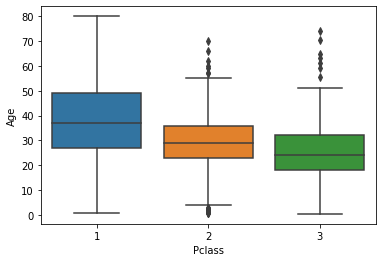

In [108]:
#Examining the distribution of age by Pclass
sns.boxplot(data=df, x='Pclass', y='Age')

In [115]:
#Getting average age values from each Pclass
c1_age = round(df[df['Pclass'] == 1]['Age'].mean(),2)
c2_age = round(df[df['Pclass'] == 2]['Age'].mean(),2)
c3_age = round(df[df['Pclass'] == 3]['Age'].mean(),2)
print('Class 1 average Age: {} \nClass 2 average Age: {} \nClass 3 average Age: {}'.format(c1_age, c2_age, c3_age))

Class 1 average Age: 38.23 
Class 2 average Age: 29.88 
Class 3 average Age: 25.14


In [117]:
#Filling missing values of age with the average per class
cond = df['Pclass']
df['Age'].fillna(cond.map({1:c1_age, 2: c2_age, 3: c3_age}), inplace=True)

In [119]:
#Filling missing values of embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [120]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [121]:
#Examining categorical variables
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)
df[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Laleff, Mr. Kristo",male,1601,S
freq,1,577,7,646


In [124]:
#Creating dummy variables for Embarked
embk_dummy = pd.get_dummies(df['Embarked'], prefix='embk', prefix_sep='.')
embk_dummy.head()

,embk.C,embk.Q,embk.S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [125]:
#Creating dummy variables for Sex
sex_dummy = pd.get_dummies(df['Sex'], prefix='Sex', prefix_sep='.', drop_first=True)
sex_dummy.head()

,Sex.male
0,1
1,0
2,0
3,0
4,1


In [126]:
#concatenating the datasets
df = pd.concat([df,embk_dummy, sex_dummy], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,embk.C,embk.Q,embk.S,Sex.male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,S,0,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,S,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14,1,2,W./C. 6607,23.4500,S,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C,1,0,0,1


In [127]:
#Dropping columns that are not suitable for logistic regression
df.drop(['Name', 'Sex', 'Ticket', 'Embarked', 'PassengerId'], inplace=True, axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,embk.C,embk.Q,embk.S,Sex.male
0,0,3,22.0,1,0,7.2500,0,0,1,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,1


In [128]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,embk.C,embk.Q,embk.S,Sex.male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.292694,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028,0.647587
std,0.486592,0.836071,13.210480,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [129]:
from sklearn.model_selection import train_test_split

In [153]:
x = df.loc[:, df.columns != 'Survived']
y = df['Survived']

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
lm = LogisticRegression()
lm.fit(x_train, y_train)

/Users/ricardopersonagomes/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
y_pred = lm.predict(x_test)

In [158]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       172
           1       0.72      0.76      0.74        96

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [160]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model on test set:" + str(accuracy))

Accuracy of the logistic regression model on test set:0.8097014925373134


In [161]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.19029850746268656


In [162]:
confusion_matrix(y_test, y_pred)

array([[144,  28],
       [ 23,  73]])